In [150]:
import matplotlib.pyplot as plt
from math import pi
from qiskit import Aer, transpile, assemble
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

In [151]:
n_qubits = 3
qpe = QuantumCircuit(4, n_qubits)
qpe.x(n_qubits)

for qubit in range(n_qubits):
    qpe.h(qubit)

In [152]:
# controlled unitary P(pi/2)  
qpe.cp(pi/2, 2, 3)

qpe.cp(pi/2, 1, 3)
qpe.cp(pi/2, 1, 3)

for i in range(4):
    qpe.cp(pi/2, 0, 3)
#qpe.draw()

In [153]:
# inverse QFT
qpe.h(0)
qpe.cp(-pi/2, 0, 1)
qpe.cp(-pi/4, 0, 2)

qpe.h(1)
qpe.cp(-pi/2, 1, 2)

qpe.h(2)
qpe.draw()

┌───┐                                                               ┌───┐»
q_0: ┤ H ├────────────────────────────■────────■────────■────────■───────┤ H ├»
     ├───┤                            │        │        │        │       └───┘»
q_1: ┤ H ├──────────■────────■────────┼────────┼────────┼────────┼────────────»
     ├───┤          │        │        │        │        │        │            »
q_2: ┤ H ├─■────────┼────────┼────────┼────────┼────────┼────────┼────────────»
     ├───┤ │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)      »
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«                                             
«q_0: ─■─────────■────────────────────────────
«      │P(-π/2)  │        ┌───┐               
«q_1: ─■─────────┼────────┤ H ├─■─────────────
«                │P(-π/4) └───┘ │P(-π/2) ┌───┐
«q_2: ───────────■──────────────■────────┤ H ├
«                                        └───┘
«q_3: ────────────────────────────────────────
«                                             
«c: 3/════════════════════════════════════════
«

In [154]:
# measure
qpe.measure(0, 0)
qpe.measure(1, 1)
qpe.measure(2, 2)

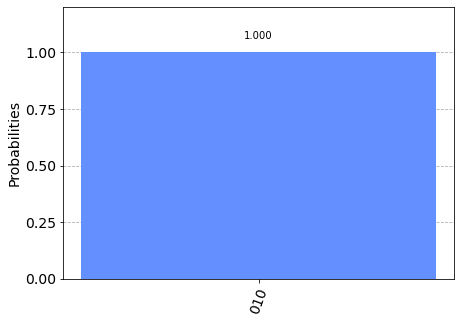

In [155]:
# simulate
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

Ergebniss muss durch $2^n$ geteilt werden, um die Phase zu erhalten
$$
P=\begin{bmatrix}
1 & 0 \\
0 & e^{\frac{i\pi}{2}}
\end{bmatrix} \qquad
T|1\rangle = e^{\frac{i\pi}{2}}|1\rangle \\
T|1\rangle = e^{2 i\pi \phi |0\rangle} \qquad \phi = \frac{1}{4}
$$